    The dataset contains the readings with a time span of 1 minute of house appliances in kW from a smart meter and weather conditions of that particular region.

    Data Columns Descriptions:
    Index
    time
    Time of the readings, with a time span of 1 minute.
    Energy Usage
    use [kW]
    Total energy consumption
    gen [kW]
    Total energy generated by means of solar or other power generation resources
    House overall [kW]
    overall house energy consumption
    Dishwasher [kW]
    energy consumed by specific appliance
    Furnace 1 [kW]
    energy consumed by specific appliance
    Furnace 2 [kW]
    energy consumed by specific appliance
    Home office [kW]
    energy consumed by specific appliance
    Fridge [kW]
    energy consumed by specific appliance
    Wine cellar [kW]
    energy consumed by specific appliance
    Garage door [kW]
    energy consumed by specific appliance
    Kitchen 12 [kW]
    energy consumption in kitchen 1
    Kitchen 14 [kW]
    energy consumption in kitchen 2
    Kitchen 38 [kW]
    energy consumption in kitchen 3
    Barn [kW]
    energy consumed by specific appliance
    Well [kW]
    energy consumed by specific appliance
    Microwave [kW]
    energy consumed by specific appliance
    Living room [kW]
    energy consumption in Living room
    Solar [kW]
    Solar power generation
    Weather







    Temperature:
    Temperature is a physical quantity expressing hot and cold.

    Humidity:
    Humidity is the concentration of water vapour present in air.

    Visibility:
    Visibility sensors measure the meteorological optical range which is defined as the length of atmosphere over which a beam of light travels before its luminous flux is reduced to 5% of its original value.

    ApparentTemperature:
    Apparent temperature is the temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind speed. The measure is most commonly applied to the perceived outdoor temperature.

    Pressure:
    Falling air pressure indicates that bad weather is coming, while rising air pressure indicates good weather

    WindSpeed:
    Wind speed, or wind flow speed, is a fundamental atmospheric quantity caused by air moving from high to low pressure, usually due to changes in temperature.

    CloudCover:
    Cloud cover (also known as cloudiness, cloudage, or cloud amount) refers to the fraction of the sky obscured by clouds when observed from a particular location. Okta is the usual unit of measurement of the cloud cover.

    WindBearing:
    In meteorology, an azimuth of 000° is used only when no wind is blowing, while 360° means the wind is from the North. True Wind Direction True North is represented on a globe as the North Pole. All directions relative to True North may be called "true bearings."

    DewPoint:
    the atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form.

    PrecipProbability:
    A probability of precipitation (POP), also referred to as chance of precipitation or chance of rain, is a measure of the probability that at least some minimum quantity of precipitation will occur within a specified forecast period and location.

    PrecipIntensity:
    The intensity of rainfall is a measure of the amount of rain that falls over time. The intensity of rain is measured in the height of the water layer covering the ground in a period of time. It means that if the rain stays where it falls, it would form a layer of a certain height.

In [65]:
import warnings
warnings.filterwarnings("ignore")

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding the data

In [67]:
df=pd.read_csv('HomeC.csv')
df.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [68]:
df.describe()

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
count,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,...,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,0.858962,0.076229,0.858962,0.031368,0.099210,0.136779,0.081287,0.063556,0.042137,0.014139,...,50.741935,0.664085,9.253444,48.263382,1016.301625,6.649936,202.356843,0.002598,38.694013,0.056453
std,1.058207,0.128428,1.058207,0.190951,0.169059,0.178631,0.104466,0.076199,0.057967,0.014292,...,19.113807,0.194389,1.611186,22.027916,7.895185,3.982716,106.520474,0.011257,19.087939,0.165836
min,0.000000,0.000000,0.000000,0.000000,0.000017,0.000067,0.000083,0.000067,0.000017,0.000017,...,-12.640000,0.130000,0.270000,-32.080000,986.400000,0.000000,0.000000,0.000000,-27.240000,0.000000
25%,0.367667,0.003367,0.367667,0.000000,0.020233,0.064400,0.040383,0.005083,0.007133,0.012733,...,35.770000,0.510000,9.420000,31.090000,1011.290000,3.660000,148.000000,0.000000,24.600000,0.000000
50%,0.562333,0.004283,0.562333,0.000017,0.020617,0.066633,0.042217,0.005433,0.008083,0.012933,...,50.320000,0.680000,10.000000,50.320000,1016.530000,5.930000,208.000000,0.000000,39.030000,0.000000
75%,0.970250,0.083917,0.970250,0.000233,0.068733,0.080633,0.068283,0.125417,0.053192,0.013100,...,66.260000,0.840000,10.000000,66.260000,1021.480000,8.940000,295.000000,0.000000,54.790000,0.000000
max,14.714567,0.613883,14.714567,1.401767,1.934083,0.794933,0.971750,0.851267,1.273933,1.088983,...,93.720000,0.980000,10.000000,101.120000,1042.460000,22.910000,359.000000,0.191000,75.490000,0.840000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

In [70]:
#Removing [kW] from column names
df.columns = [feature.replace(' [kW]', '') for feature in df.columns]
df.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

In [71]:
#Furnace1 and Furnace2 columns can be combined

In [72]:
df['Furnace']=df[['Furnace 1','Furnace 2']].sum(axis=1)

In [73]:
df.drop(['Furnace 1','Furnace 2'],axis=1,inplace=True)

In [74]:
df.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Home office',
       'Fridge', 'Wine cellar', 'Garage door', 'Kitchen 12', 'Kitchen 14',
       'Kitchen 38', 'Barn', 'Well', 'Microwave', 'Living room', 'Solar',
       'temperature', 'icon', 'humidity', 'visibility', 'summary',
       'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'Furnace'],
      dtype='object')

In [75]:
df['Kitchen'] = df[['Kitchen 12','Kitchen 14','Kitchen 38']].sum(axis=1)

In [76]:
df.drop(['Kitchen 12','Kitchen 14','Kitchen 38'],axis=1,inplace=True)

In [77]:
df.columns


Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Home office',
       'Fridge', 'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'Furnace', 'Kitchen'],
      dtype='object')

The column 'time' is in unix timestamp. Convert the timestamp to date and time.

In [78]:
import time
#Finding the start time
start_time=time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(df['time'].iloc[0])))

In [79]:
#Converting the unix timestamp values in the column 'time' to a readable date format
#Setting freq= 'min' since readings are being taken in a time span of one min
time_index = pd.date_range(start_time, periods=len(df),  freq='min')  
time_index = pd.DatetimeIndex(time_index)
df = df.set_index(time_index)
df = df.drop(['time'], axis=1)

In [80]:
df.head()

,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen
2015-12-31 21:00:00,0.932833,0.003483,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.082617,0.000567
2015-12-31 21:01:00,0.934333,0.003467,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.084533,0.000567
2015-12-31 21:02:00,0.931817,0.003467,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.083017,0.000617
2015-12-31 21:03:00,1.022050,0.003483,1.022050,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.175417,0.000650
2015-12-31 21:04:00,1.139400,0.003467,1.139400,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.300917,0.000783


In [81]:
#Checking whether use and House overall columns are same
df['use'].equals(df['House overall'])

True

In [82]:
#Therefore one can be dropped
df=df.drop(['House overall'], axis=1)

In [83]:
#Checking whether gen and Solar columns are same
df['gen'].equals(df['Solar'])

True

In [84]:
#Therefore one can be dropped
df=df.drop(['Solar'], axis=1)

In [85]:
df.rename(columns={'use':'Used','gen':'Generated '}, inplace=True)
df.columns

Index(['Used', 'Generated ', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'Furnace', 'Kitchen'],
      dtype='object')

In [86]:
df['summary'].unique()

array(['Clear', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Drizzle',
       'Light Rain', 'Rain', 'Light Snow', 'Flurries', 'Breezy', 'Snow',
       'Rain and Breezy', 'Foggy', 'Breezy and Mostly Cloudy',
       'Breezy and Partly Cloudy', 'Flurries and Breezy', 'Dry',
       'Heavy Snow', nan], dtype=object)

In [87]:
df['icon'].unique()

array(['clear-night', 'partly-cloudy-night', 'clear-day', 'cloudy',
       'partly-cloudy-day', 'rain', 'snow', 'wind', 'fog', nan],
      dtype=object)

# EDA

In [88]:
df.columns

Index(['Used', 'Generated ', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'Furnace', 'Kitchen'],
      dtype='object')

In [89]:
#Seperating Energy and Weather data for convinience

In [90]:

energy_data = df.filter(items=['Used', 'Generated ', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room','Furnace', 'Kitchen' ])
weather_data = df.filter(items=['temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'])

In [91]:
energy_data.head()

,Used,Generated,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Furnace,Kitchen
2015-12-31 21:00:00,0.932833,0.003483,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,0.082617,0.000567
2015-12-31 21:01:00,0.934333,0.003467,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,0.084533,0.000567
2015-12-31 21:02:00,0.931817,0.003467,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,0.083017,0.000617
2015-12-31 21:03:00,1.022050,0.003483,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,0.001617,0.175417,0.000650
2015-12-31 21:04:00,1.139400,0.003467,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,0.001583,0.300917,0.000783


# Analysing Energy Data

In [92]:
#Extracting monthly energy consumption from data

In [93]:
usage_per_month=energy_data.resample('M').sum()

In [94]:
usage_per_month

,Used,Generated,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Furnace,Kitchen
2015-12-31,160.621967,0.610617,0.012318,19.711433,10.372117,11.008583,2.350850,6.750067,0.184617,1.806800,0.285083,73.323933,0.137736
2016-01-31,46603.505217,2597.516383,1682.024550,4079.783300,2464.475900,847.339600,608.741983,3324.497483,768.992351,430.363717,1930.688966,20279.302833,469.142356
2016-02-29,41470.390183,2704.246067,1330.636983,2876.776700,2234.417533,821.061667,572.429800,2817.824967,741.003333,387.983350,1399.957217,19186.516233,411.152249
2016-03-31,33923.132967,3795.811933,1506.495251,3523.087867,2365.945567,1274.874133,614.588317,1790.913317,731.894633,426.247234,1585.834750,13032.847850,400.446095
2016-04-30,29763.214933,3893.549983,1443.405491,3124.138100,2477.509650,1546.754900,627.440900,2672.517467,664.569017,494.758934,1571.922050,9356.905750,314.357581
2016-05-31,25473.135183,3670.670367,1180.810134,2786.954679,2648.791283,1576.933471,617.180333,3284.714146,452.908733,418.671084,1178.556233,5956.274888,291.126454
2016-06-30,23178.963233,4496.232667,1130.612114,3294.853383,3026.116100,1996.806567,627.379633,3079.026717,804.708283,342.326884,1184.200967,4018.976783,285.770750
2016-07-31,52136.426100,4092.643934,1239.695735,4071.082017,3548.490767,2897.645833,653.808917,2263.427767,767.876017,534.796967,1044.145617,7655.954067,410.229083
2016-08-31,61897.152617,4192.547666,1413.271632,4410.833217,3790.227433,4417.218300,616.728883,1654.716567,629.122750,605.166734,1789.837917,8724.946317,539.133692
2016-09-30,31736.971433,3486.895750,1350.791839,3565.612850,3211.399100,2757.722367,622.901300,2666.240933,583.676784,472.976350,1466.949933,4672.172817,535.569433


# Visualizing Energy Consumption By Each Romm/Appliance in first and last month

In [120]:

usage_per_month.columns

Index(['Used', 'Generated ', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Furnace', 'Kitchen'],
      dtype='object')

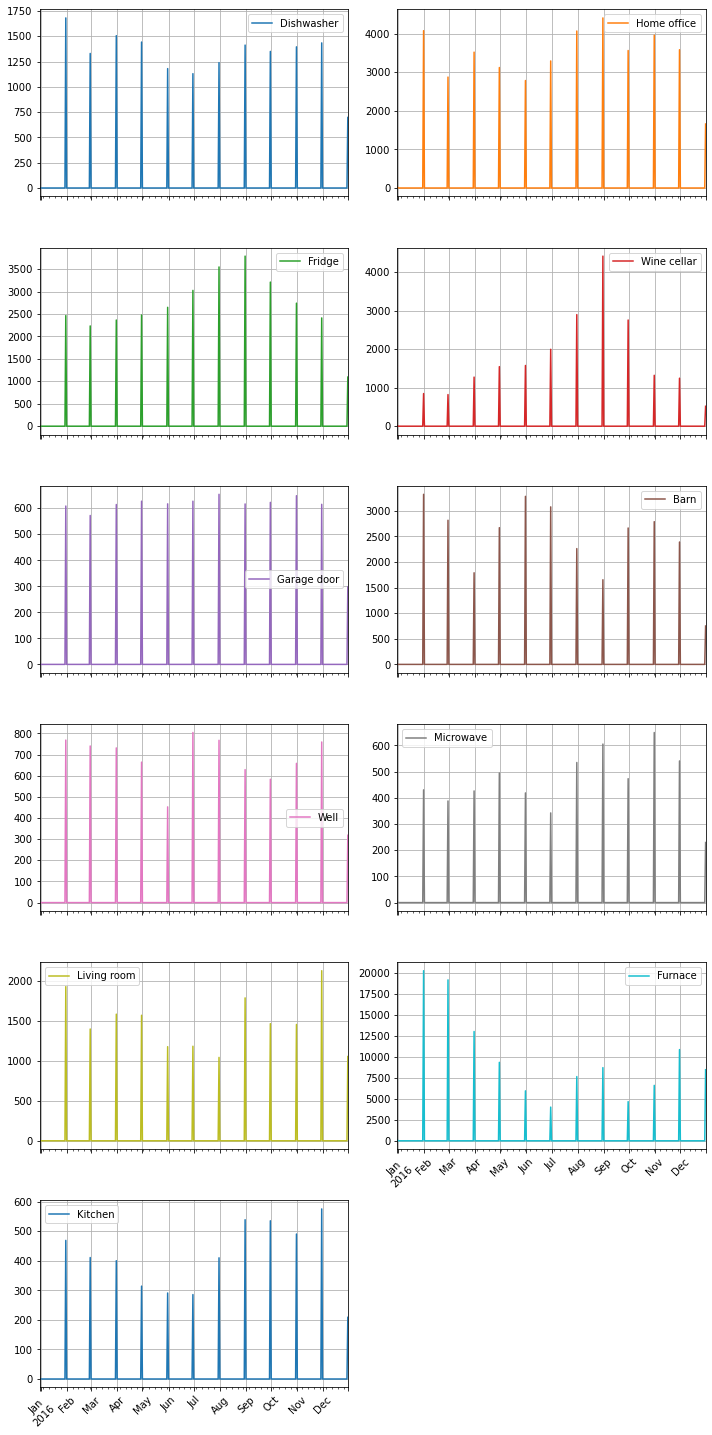

In [113]:
usage_per_month[usage_per_month.columns[2::].tolist()].resample("D").sum().plot(subplots=True, layout=(6, 2), figsize=(10, 20),
                                                                grid=True, rot=45)
plt.tight_layout()

<AxesSubplot:>

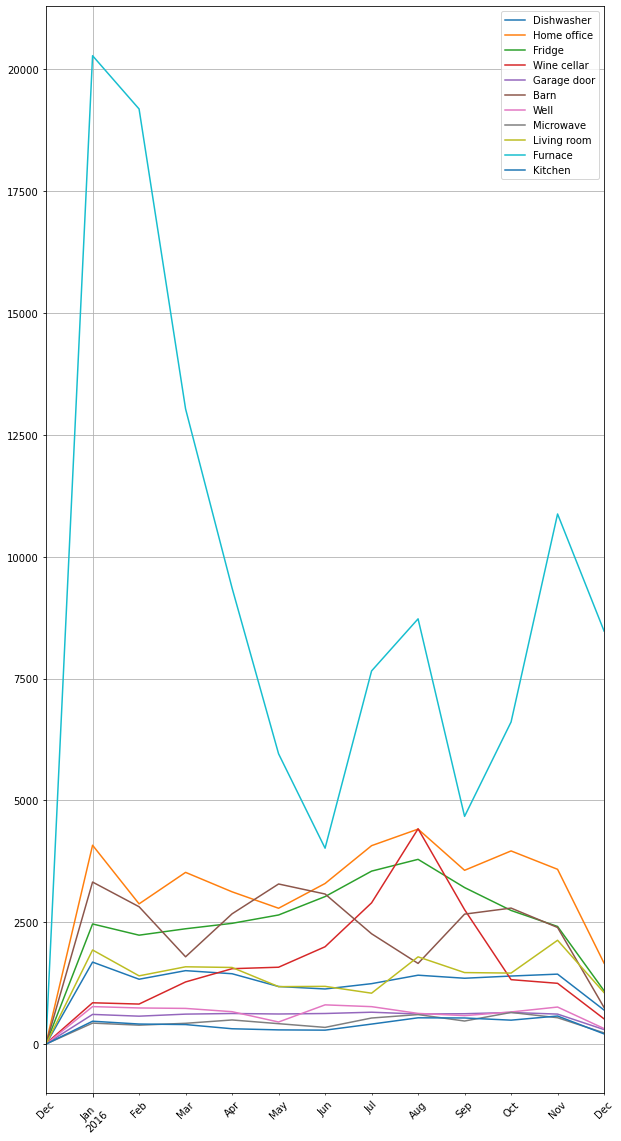

In [119]:
usage_per_month[usage_per_month.columns[2::].tolist()].plot(figsize=(10, 20),
                                                                grid=True, rot=45)

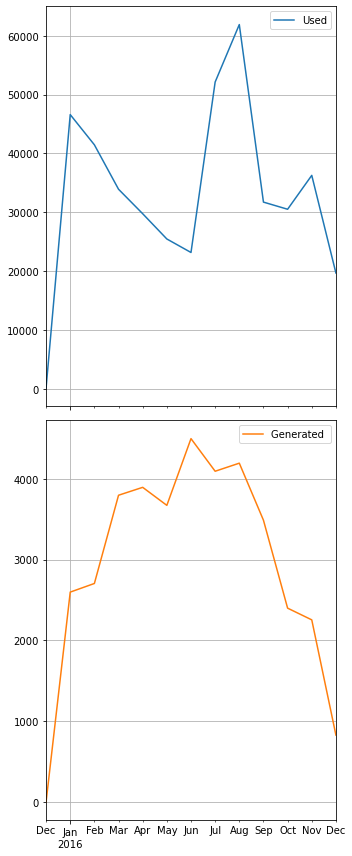

In [114]:
#usage_per_month[['Used','Generated ']].plot(subplots=True,figsize=(5, 12),grid=True)
#plt.tight_layout()